In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [8]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
print(X[:5])   # first 5 rows


[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])   # scaled values check


[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


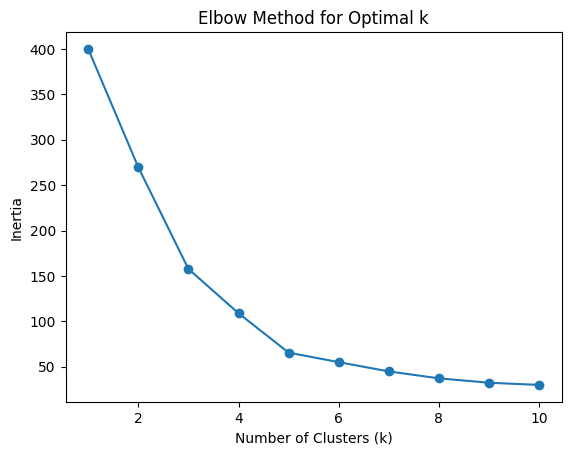

In [11]:
inertia = []
K = range(1,11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [12]:
k = 5  # number of clusters from elbow method
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Add cluster column to dataset
df['Cluster'] = labels
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


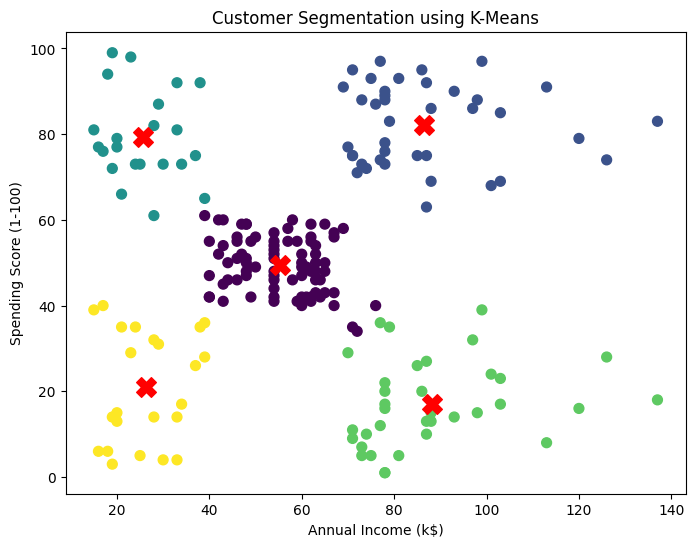

In [13]:
# Cluster centers (denormalized to original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)   # customers
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='red', marker='X')  # centroids
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.show()


In [14]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.5546571631111091


In [15]:
df.groupby('Cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [16]:
df.to_csv("segmented_customers.csv", index=False)
